### Background & Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved.
Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster.    Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

### Objectives

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

### Topics Index

- <a href = #link1>Import Python libraries and acquire the data set</a>
- <a href = #link2> Basic EDA (Exploratory Data Analysis)</a>
- <a href = #link3> EDA - Univariable, Bivariate and Multivariate analysis</a>
- <a href = #link4> Data preprocessing </a>
- <a href = #link5> Applying K-means clustering   </a>
- <a href = #link6> Applying Hierarchical clustering   </a>
- <a href = #link7> Compare clusters from K-means and Hierarchical Clustering and perform cluster profiling   </a>
- <a href = #link8> Conclusions and wrap up  </a>


### <a name='link1'> Import Python libraries and acquire the data set </a>

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd
import math

# Libraries for data visualization and better presentation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Libraries for splitting data, imputing missing values , data preprocessing, scaling and one hot encoding
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.preprocessing import LabelEncoder , PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
 

# Libraries to scale the data  
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Libraries to build a model 
from sklearn.model_selection  import train_test_split

# Libraries to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Libraries to compute distances
from scipy.spatial.distance import cdist, pdist

# Libraries to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, ward, fcluster, centroid
 

# Libraries to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Libraries to perform PCA
from sklearn.decomposition import PCA


 

In [2]:
# Data acquisition 
card = pd.read_csv ('Credit Card Customer Data.csv')

### <a name='link2'> Basic EDA (Exploratory Data Analysis) </a>

In [3]:
# Check number of records and columns 
card.shape 

(660, 7)

In [4]:
np.random.seed(1)  # To get the same random results 
card.sample(n=10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


In [5]:
# Check the data types and number of null values 
card.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
# Count for unique values 
card.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [7]:
# Basic summary stats - numeric variables
card.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


**Observations**

We assume monetary values are in USD.   

-The dataset is not very big, with 660 records and only a few handful variables.  
-We have numeric variables, and it looks like no values are missing.   
-Customer and serial numbers are not very useful, but we will take care of them during data pre-processing.    
-The average credit limit is ~34K USD vs. an 18K USD median.   
The total number of credit cards the customers hold, the average, and the median are around the value ~5.    
-Visits to the bank, the average is ~2.4 and median 2.   
-Online visit looks like is higher, average ~2.6 and median 2.    
-Calls made, the average is 3.5 and the median is 3.   


### <a name='link3'> EDA - Univariable, Bivariate and Multivariate analysis </a>

In [8]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [9]:
# Creating a list of relevant columns for the analysis
variables_col = [
"Avg_Credit_Limit",       
"Total_Credit_Cards",     
"Total_visits_bank",       
"Total_visits_online",    
"Total_calls_made",       
]

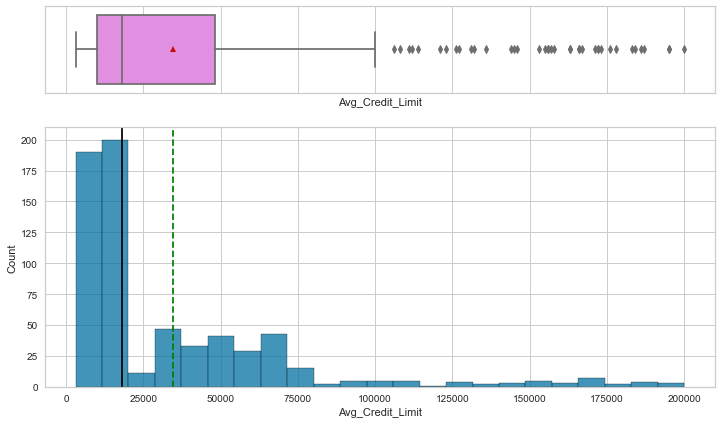

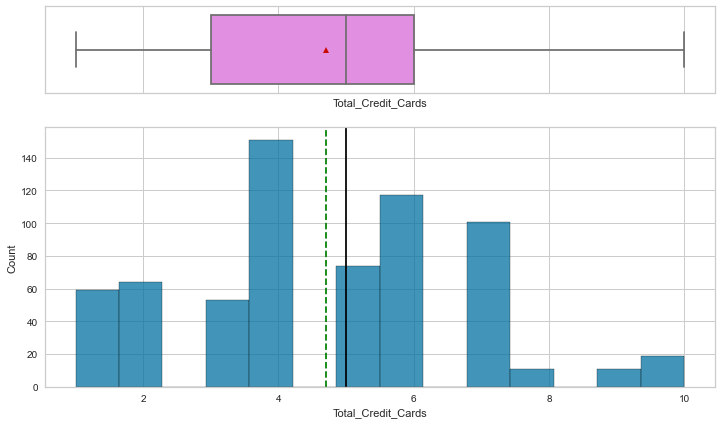

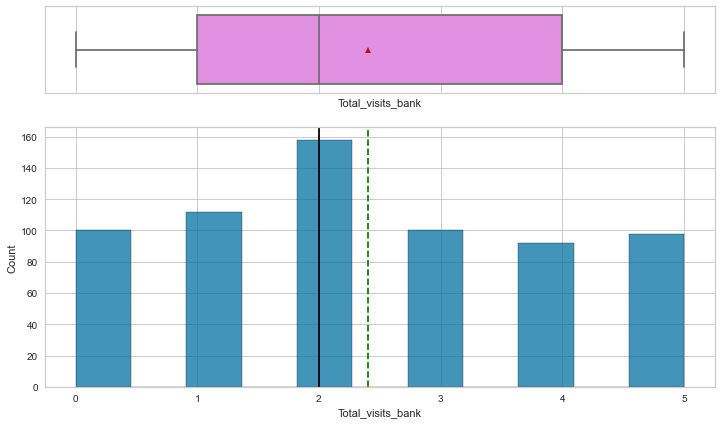

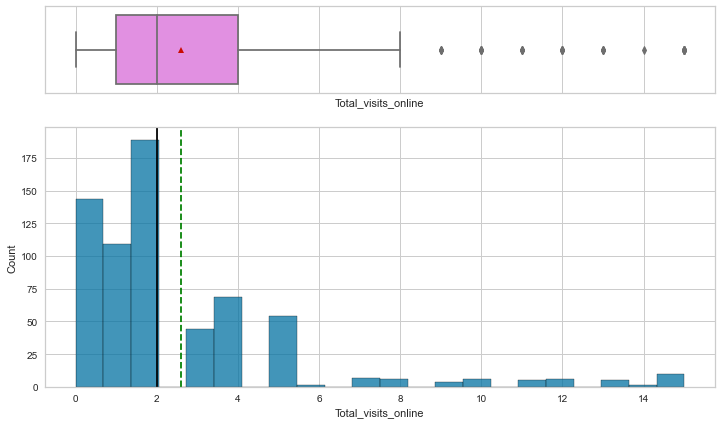

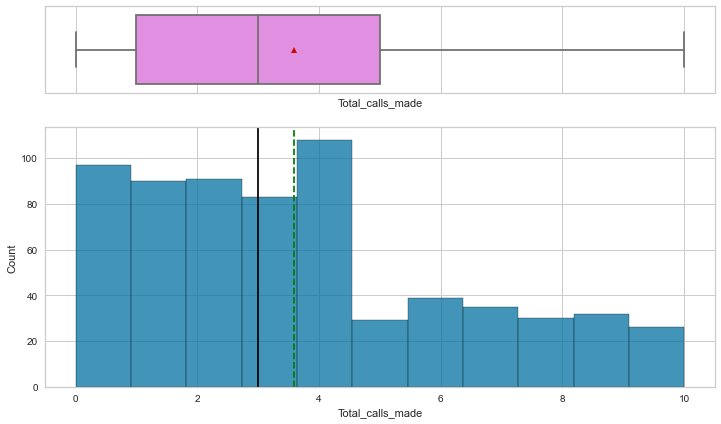

In [10]:
# selecting relevant columns


for item in variables_col:
    histogram_boxplot(card, item)

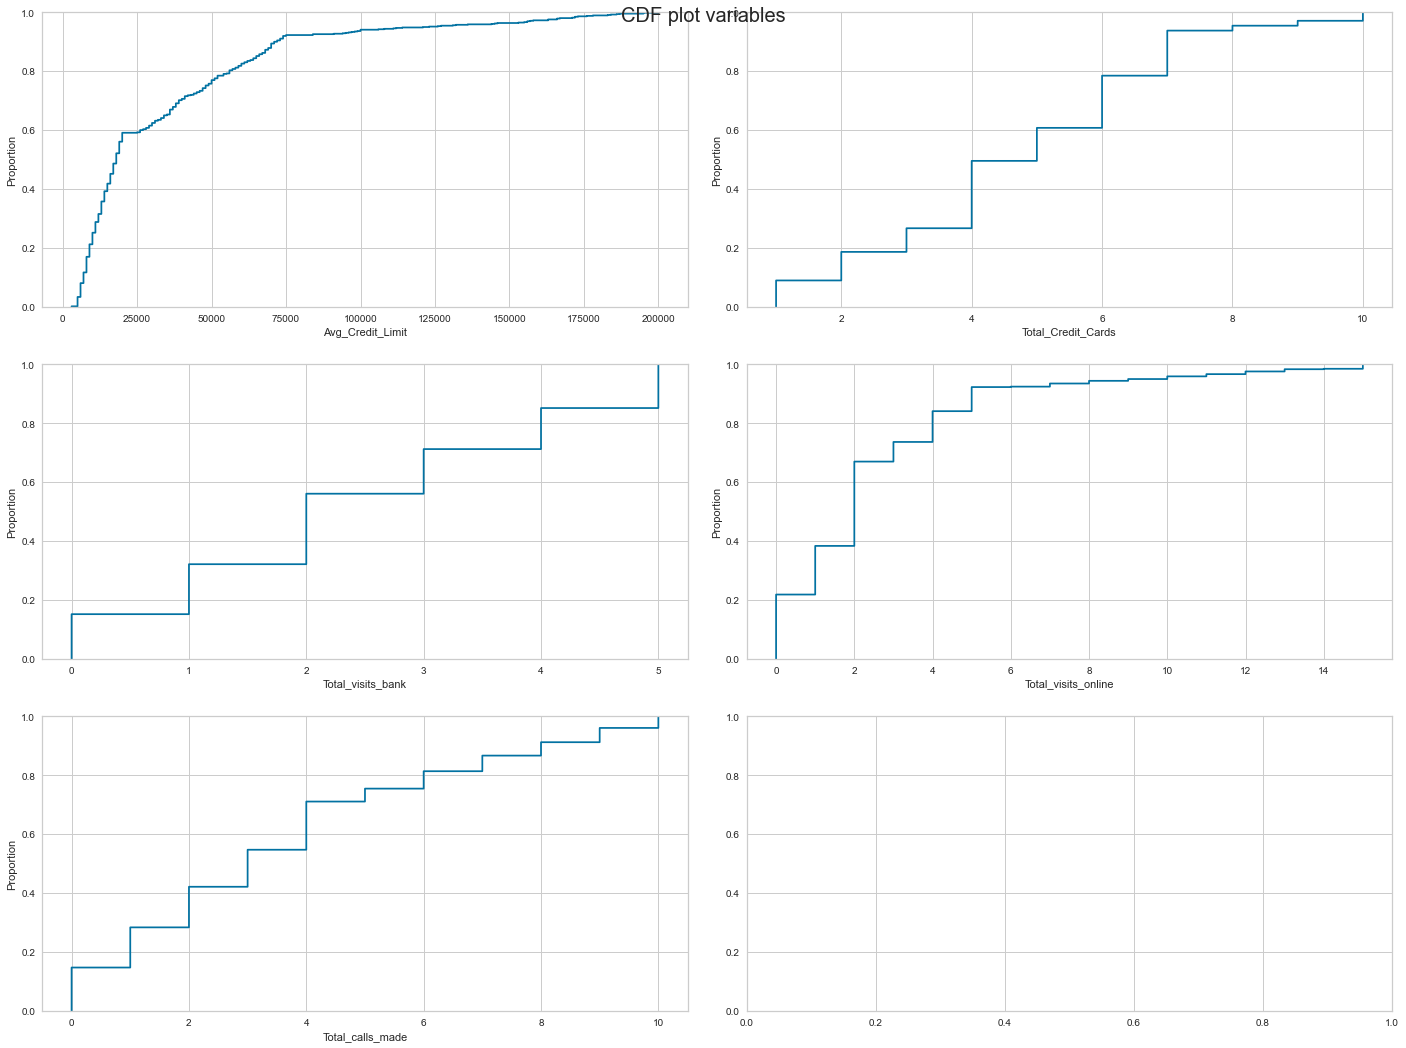

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=card[variables_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=card[variables_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

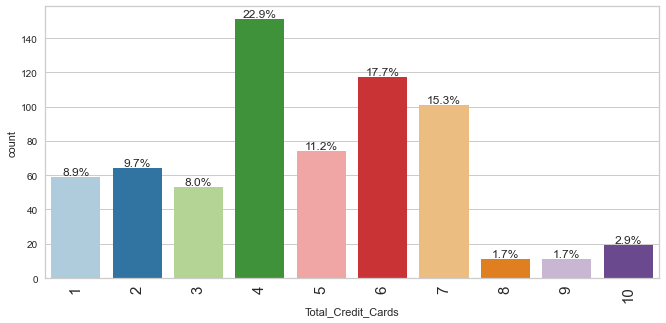

In [13]:
# let's explore ??  further
labeled_barplot(card, "Total_Credit_Cards", perc=True)

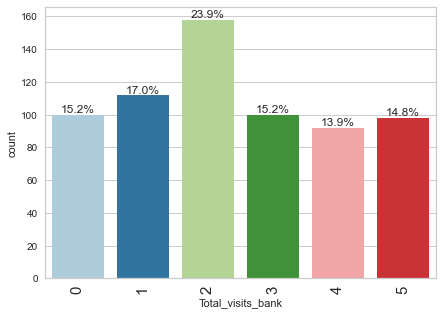

In [14]:
# let's explore ??  further
labeled_barplot(card, "Total_visits_bank", perc=True)

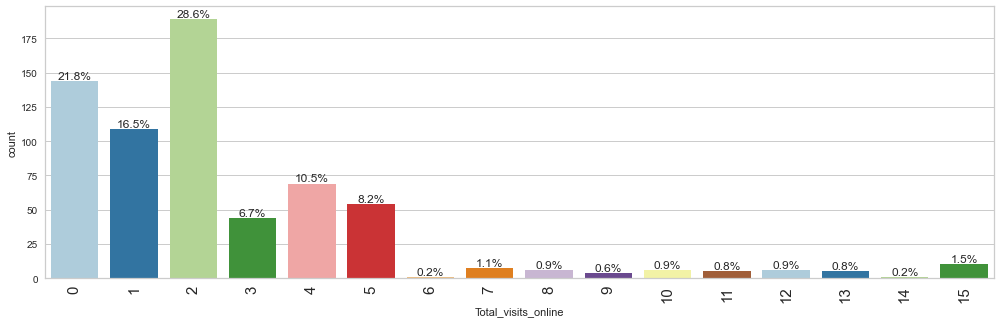

In [15]:
# let's explore ??  further
labeled_barplot(card, "Total_visits_online", perc=True)

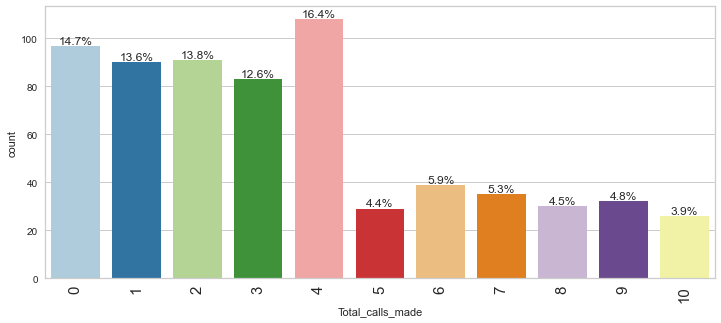

In [16]:
# let's explore ??  further
labeled_barplot(card, "Total_calls_made", perc=True)

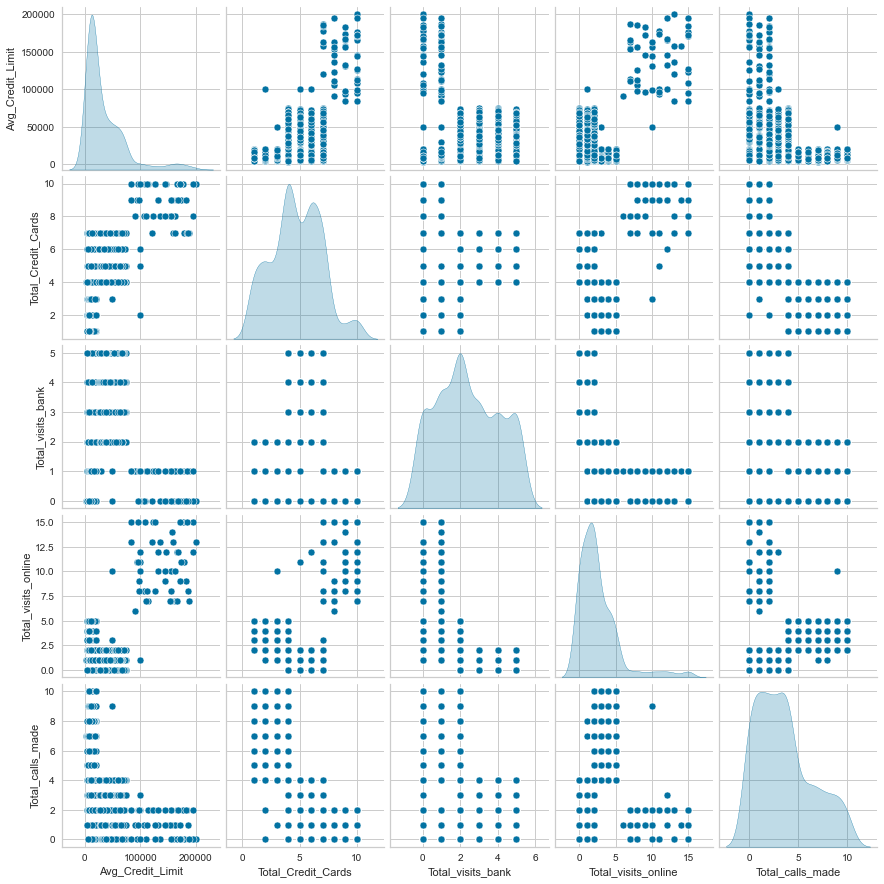

In [17]:
sns.pairplot(data=card[variables_col], diag_kind="kde")
plt.show()

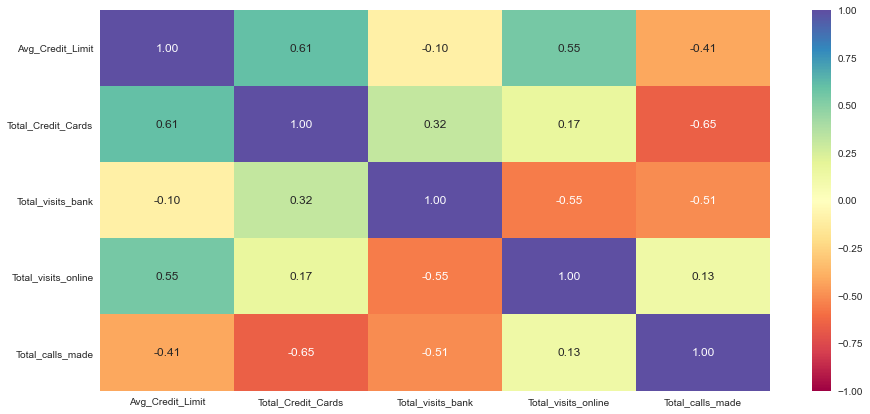

In [18]:
plt.figure(figsize=(15, 7))
sns.heatmap(card[variables_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

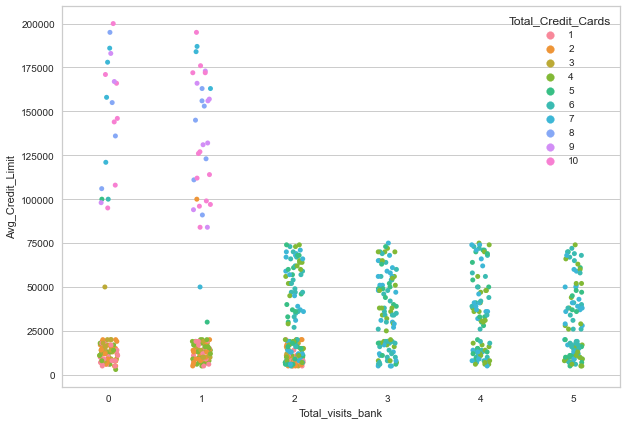

In [19]:
# Let check the credit limit vs. visits to the bank in the context of total nbr of credit cards 
plt.figure(figsize=(10, 7))
sns.stripplot(y="Avg_Credit_Limit", x="Total_visits_bank", hue="Total_Credit_Cards", data=card)

<Figure size 4320x4320 with 0 Axes>

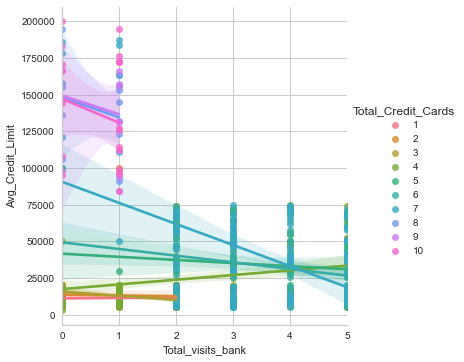

In [20]:
# Check Credit limit and average utilization ratio correlation in the context of attrition

plt.figure(figsize=(60, 60))
 

sns.lmplot (data= card , y="Avg_Credit_Limit", x="Total_visits_bank", hue="Total_Credit_Cards" , fit_reg =True);
plt.show()

**Observations**

We can see credit limit is having a Right Skewed distribution with high outliers. As well the CFD parabola complement this picture.   
The total number of credit cards is concentrated in the middle, with no outliers. Almost 70% is having 4 to 7 credit cards, with very few having over 7 credit cards.    
The total number of visits to the back as well is concentrated in the middle, with no outliers. ~24% are visiting twice the rest is more equally distributed between around 0, 1, 3, 4, and 5 visits.     
The total number of visits online is Right Skewed with outliers. Almost 22% are not visiting online, and then ~71% are visiting online 1 to 5 times.      
~15% are not calling, ~56%  are calling 1 to 4 times. Many of the calls made are up to 4 with some calling up to 10 times.     

The pair plot shows some type of correlations across variables but let's check the correlation matrix to check deeper. As well we can observe different peaks may be indicating some type of segmentation.    

Correlations :    
-	The total number of credit cards and credit card limit is having a 61% positive correlation followed by 32% positive correlation visits to the bank.      
-	The number of credit cards and the total number of calls is 65% negatively correlated.       
-	The visits and visits online to the bank are ~55% negatively correlated, and the total visits and the total number of calls correlate negatively 51%. It looks like these two options compete.    
-	The rest of the correlations are less than 20% so they are not very interesting.   

We can see the customers with middle credit limits range visit 2 to 5 times are having less than 75K USD credit limit.   
Another interesting customer group visiting the bank 0 or 1 time, gradually decreasing until 5 times together with the number of credit cards increase. Credit limit, less than 25K USD.    
Last customers as well not visiting the bank or at least once but having high credit limits and the total number of credit cards.    

Maybe these can give a clue about the right clusters but let prepare the data for model building purposes.  
    



**Problem definition**

   
The challenge is trying to group the customers into the right number of clusters, correlating the number of credit cards, credit limit, and level/type of interaction needed/preferred by the customers.    
Based on such we can profile the customer segmentation and provide more appropriate credit limits but particularly the way to improve the customers' interaction and experience to increase the market penetration.    
Principal Component Analysis (PCA) is not necessary, we have very few variables.  


### <a name='link4'> Data preprocessing </a>

We are going to pre-process the below variables.    

No valuable variables for model building, we will drop them:   

-	Sl_No	DONE   
-	Customer Key DONE   

Missing values or duplicate records:   

-	Results below show we don't have such a case.  

Outliers’ treatment :     

-	Total_visits_online DONE   
-	Avg_Credit_Limit  DONE   

Scaling the variables to ensure not having some variables overweighting into some specific direction (e.g., in our case Avg_Credit_Limit units).   DONE   

We have a very limited number of variables, so we are not going to perform feature engineering.   






In [21]:
# variables to use for clustering
variables_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [22]:
# looking at which columns have the most missing values
card.isnull().sum().sort_values(ascending=False)

Total_calls_made       0
Total_visits_online    0
Total_visits_bank      0
Total_Credit_Cards     0
Avg_Credit_Limit       0
Customer Key           0
Sl_No                  0
dtype: int64

In [23]:
# let's check for duplicate observations
card.duplicated().sum()

0

In [24]:
# Create another duplicate dataset for data preprocessing  
card1 = card.copy()
card1.head ()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [25]:
# Drop Customer and Serial numbers, they are not useful
card1.drop(['Sl_No','Customer Key'], axis=1, inplace=True)
card1.head ()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [26]:
# Create another duplicate dataset for data preprocessing , outliers
card2 = card1.copy()
card2.head ()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


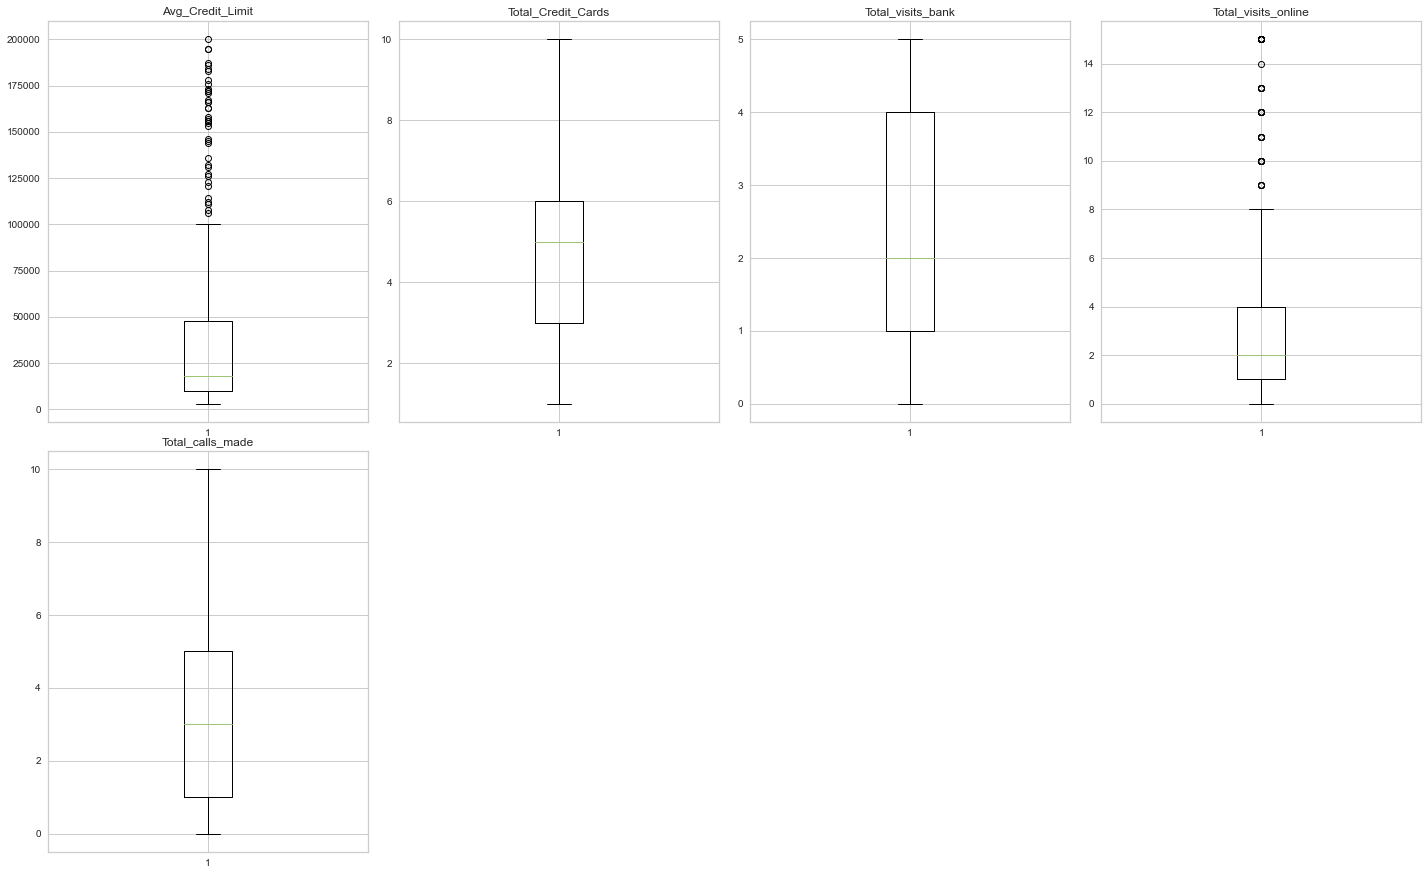

In [27]:
# let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(20, 30))

for i, variable in enumerate(card2):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(card2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

    
plt.show()

In [28]:
# Defining variables targeted for outlier treatment per above results

outlier_columns = card2[[
'Total_visits_online', 
'Avg_Credit_Limit' 
]]

In [29]:


# Let's treat outliers by flooring and capping, we used card2 dataset now
def treat_outliers(card2, col):
    """
    treats outliers in a variable
    col: str, name of the outlier variable
    card2: dataframe
    col: name of the column
    """
    Q1 = card2[col].quantile(0.25)  # 25th quantile
    Q3 = card2[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    card2[col] = np.clip(card2[col], Lower_Whisker, Upper_Whisker)

    return card2


def treat_outliers_all( card2 , outlier_columns):
    """
    treat outlier in relevant variables
    outlier_columns: list of variables
    card2: data frame
    """
    for c in outlier_columns:
        card2 = treat_outliers(card2, c)

    return card2

In [30]:
# Let run the outlier treat function

card2 = treat_outliers_all(card2, outlier_columns)

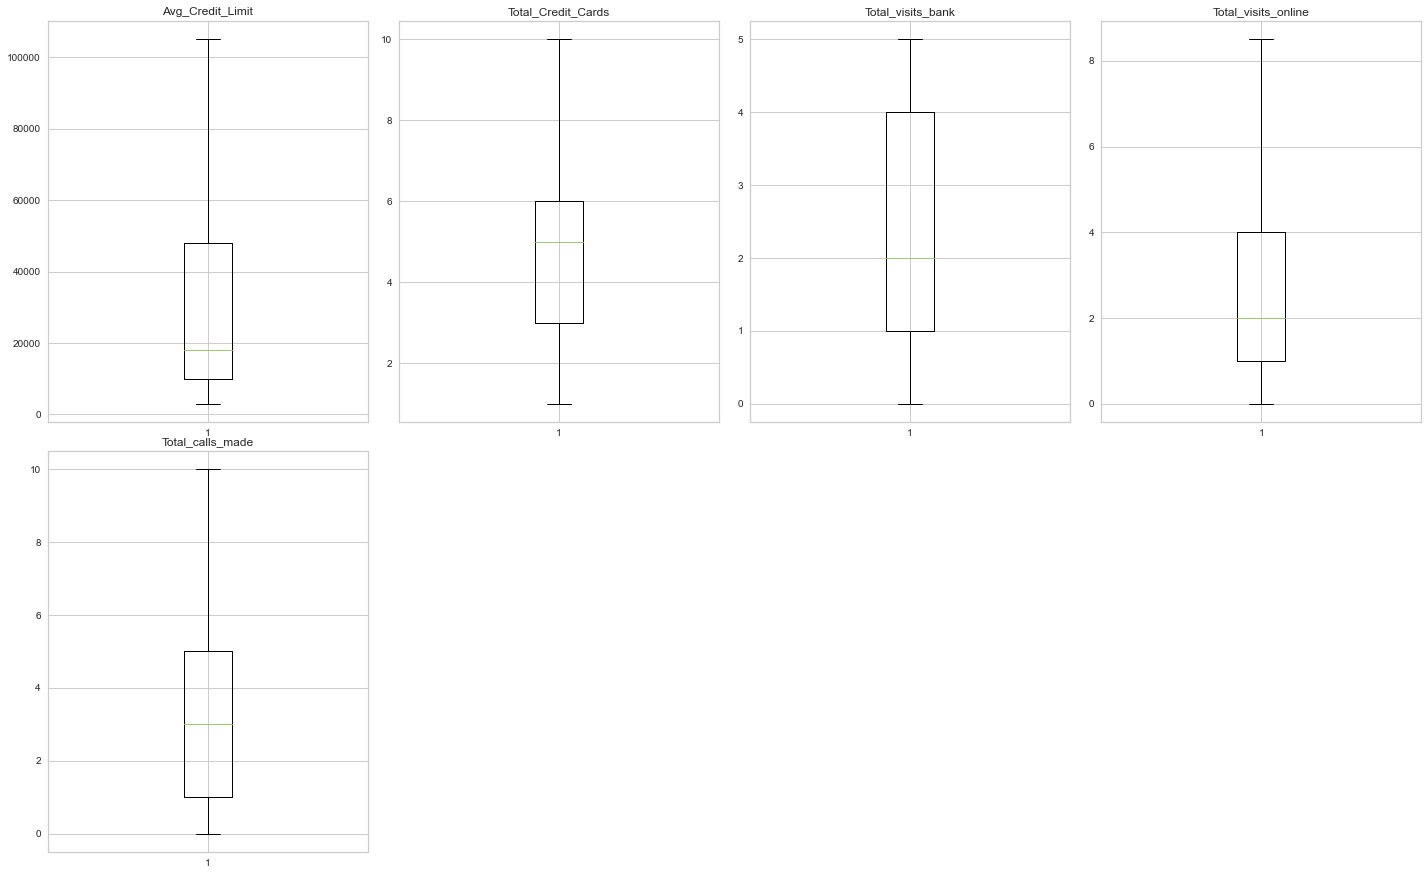

In [31]:
# let look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(card2):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(card2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [32]:
# Create another duplicate dataset for data preprocessing , after outliers processing for scaling + K Means
card3 = card2.copy()
card3.head ()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1.0,0
1,50000,3,0,8.5,9
2,50000,7,1,3.0,4
3,30000,5,1,1.0,4
4,100000,6,0,8.5,3


In [33]:
# Create another duplicate dataset for data preprocessing , with out outliers processing for scaling + K Means
card4 = card1.copy()
card4.head ()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [34]:
# Create another duplicate dataset for data preprocessing , with out outliers processing for scaling Hirarchical Clustering
card5 = card2.copy()
card5.head ()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1.0,0
1,50000,3,0,8.5,9
2,50000,7,1,3.0,4
3,30000,5,1,1.0,4
4,100000,6,0,8.5,3


In [35]:
#  Create another duplicate dataset for data preprocessing , with out outliers processing for scaling Hirarchical Clustering
card6 = card1.copy()
card6.head ()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [36]:
# scaling the dataset before clustering for K Means
scaler_no_outlier_k = StandardScaler()
set_scaled_no_outlier_k = scaler_no_outlier_k.fit_transform(card3)

# creating a dataframe of the scaled columns
set_scaled_no_outlier_df_k = pd.DataFrame(set_scaled_no_outlier_k, columns=card3.columns)

In [37]:
# scaling the dataset before clustering for K Means
scaler_with_outlier_k = StandardScaler()
set_scaled_with_outlier_k = scaler_with_outlier_k.fit_transform(card4)

# creating a dataframe of the scaled columns
set_scaled_with_outlier_df_k = pd.DataFrame(set_scaled_with_outlier_k, columns=card4.columns)

In [38]:
# scaling the dataset before clustering for Hirarchical Clustering
scaler_no_outlier_hir = StandardScaler()
set_scaled_no_outlier_hir = scaler_no_outlier_hir.fit_transform(card5)

# creating a dataframe of the scaled columns
set_scaled_no_outlier_df_hir = pd.DataFrame(set_scaled_no_outlier_hir, columns=card5.columns)

In [39]:
# scaling the dataset before clustering for K Means
scaler_with_outlier_hir = StandardScaler()
set_scaled_with_outlier_hir = scaler_with_outlier_hir.fit_transform(card6)

# creating a dataframe of the scaled columns
set_scaled_with_outlier_df_hir = pd.DataFrame(set_scaled_with_outlier_hir, columns=card6.columns)



We created four very clear data set for future model building so we can check results with and without outlier’s treatment and as well afterwards be able to merge the K-Means and Hierarchical Clustering results with these base datasets.     


-	Outlier treatment for K-Means -> set_scaled_no_outlier_df_k   ,  card3   

-	No Outlier treatment for K-Means -> set_scaled_with_outlier_df_k ,  card4   

-	Outlier treatment for Hierarchical Clustering -> set_scaled_no_outlier_df_hir , card5   

-	No Outlier treatment for K-Means -> set_scaled_with_outlier_df_hir,  card6     

 


### <a name='link5'> Applying K-means clustering  </a>



We are going to build a K-means clustering option from 1 to 15, the K=15 is arbitrary trying to choose a large number to ensure we are not missing the right option.  


Number of Clusters: 1 	Average Distortion: 2.0731463576129583
Number of Clusters: 2 	Average Distortion: 1.4986141501796377
Number of Clusters: 3 	Average Distortion: 1.1823298853410935
Number of Clusters: 4 	Average Distortion: 1.0711026440504199
Number of Clusters: 5 	Average Distortion: 1.0049111763726386
Number of Clusters: 6 	Average Distortion: 0.9521128490612949
Number of Clusters: 7 	Average Distortion: 0.9148516542777971
Number of Clusters: 8 	Average Distortion: 0.8926613399204224
Number of Clusters: 9 	Average Distortion: 0.8720322353909248
Number of Clusters: 10 	Average Distortion: 0.8535750882090981
Number of Clusters: 11 	Average Distortion: 0.8324060963380534
Number of Clusters: 12 	Average Distortion: 0.8168621248524068
Number of Clusters: 13 	Average Distortion: 0.8011368464158676
Number of Clusters: 14 	Average Distortion: 0.7773123047220423


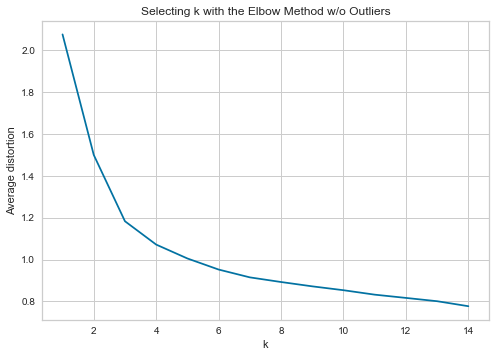

In [40]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(set_scaled_no_outlier_df_k)
    prediction = model.predict(set_scaled_no_outlier_df_k)
    distortion = (
        sum(
            np.min(cdist(set_scaled_no_outlier_df_k, model.cluster_centers_, "euclidean"), axis=1)
        )
        / set_scaled_no_outlier_df_k.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method w/o Outliers")
plt.show()

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9430843103448057
Number of Clusters: 7 	Average Distortion: 0.9105437799593306
Number of Clusters: 8 	Average Distortion: 0.8901779481474981
Number of Clusters: 9 	Average Distortion: 0.8633206364314889
Number of Clusters: 10 	Average Distortion: 0.8418429192075392
Number of Clusters: 11 	Average Distortion: 0.8203252021585336
Number of Clusters: 12 	Average Distortion: 0.8047126669549169
Number of Clusters: 13 	Average Distortion: 0.7858939969189357
Number of Clusters: 14 	Average Distortion: 0.7690411569661003


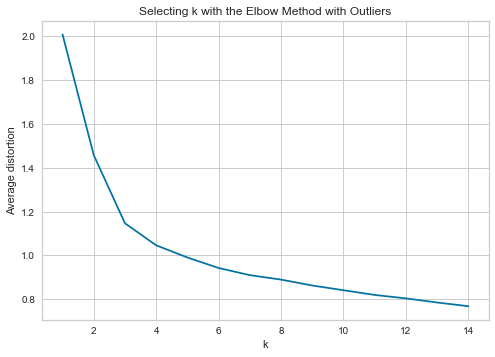

In [41]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(set_scaled_with_outlier_df_k)
    prediction = model.predict(set_scaled_with_outlier_df_k)
    distortion = (
        sum(
            np.min(cdist(set_scaled_with_outlier_df_k, model.cluster_centers_, "euclidean"), axis=1)
        )
        / set_scaled_with_outlier_df_k.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method with Outliers")
plt.show()

 We calculated the Average Distortion per number of clusters and we can observe the highest improvement occurred until 3 clusters, then gradually decreased.   
The Elbow Curve shows it very clearly.     
The results with Treated Outliers and without Treated Outliers are almost the same.    


 With out Outliers
For n_clusters = 2, the silhouette score is 0.4201583924929177)
For n_clusters = 3, the silhouette score is 0.5169867470092899)
For n_clusters = 4, the silhouette score is 0.38147048130671246)
For n_clusters = 5, the silhouette score is 0.3532334964432928)
For n_clusters = 6, the silhouette score is 0.27247133444115307)
For n_clusters = 7, the silhouette score is 0.2675372173174733)
For n_clusters = 8, the silhouette score is 0.2581852608379262)
For n_clusters = 9, the silhouette score is 0.2385209916635613)
For n_clusters = 10, the silhouette score is 0.24384336113300772)
For n_clusters = 11, the silhouette score is 0.23590832735861614)
For n_clusters = 12, the silhouette score is 0.24024813250339044)
For n_clusters = 13, the silhouette score is 0.23290717008123205)


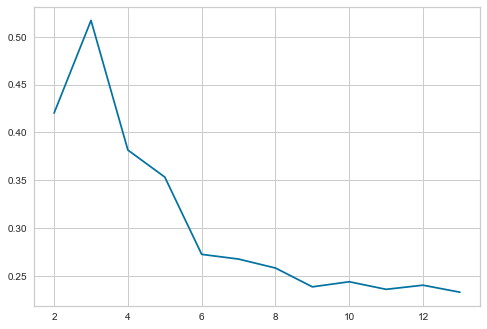

In [42]:
# Calculate the silhouette score to chose the optimal number of clusters 
print (" With out Outliers")
sil_score = []
cluster_list = list(range(2, 14))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((set_scaled_no_outlier_df_k))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(set_scaled_no_outlier_df_k, preds)
    sil_score.append(score)
   
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

 With  Outliers
For n_clusters = 2, the silhouette score is 0.41842496663215445)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3556670619372605)
For n_clusters = 5, the silhouette score is 0.2717470361089752)
For n_clusters = 6, the silhouette score is 0.25588029066344975)
For n_clusters = 7, the silhouette score is 0.24857211535274673)
For n_clusters = 8, the silhouette score is 0.23349746304182364)
For n_clusters = 9, the silhouette score is 0.21929019332176045)
For n_clusters = 10, the silhouette score is 0.20695001068745295)
For n_clusters = 11, the silhouette score is 0.20975768203380835)
For n_clusters = 12, the silhouette score is 0.2099220392852273)
For n_clusters = 13, the silhouette score is 0.2164508363889361)


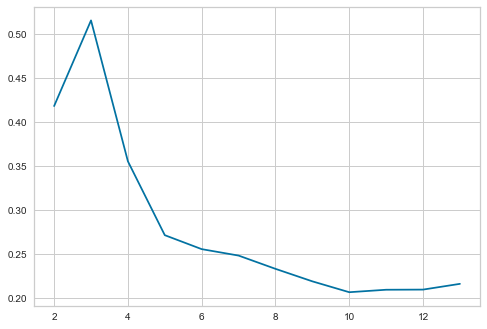

In [43]:
# Calculate the silhouette score to chose the optimal number of clusters 
print (" With  Outliers")
sil_score = []
cluster_list = list(range(2, 14))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((set_scaled_with_outlier_df_k))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(set_scaled_with_outlier_df_k, preds)
    sil_score.append(score)
   
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

The highest Silhouette score is ~0.51 showing K = 3 is the best option. It’s almost the same with and without outliers’ datasets. So, moving forward we are going to continue only with the Treated Outliers dataset. 



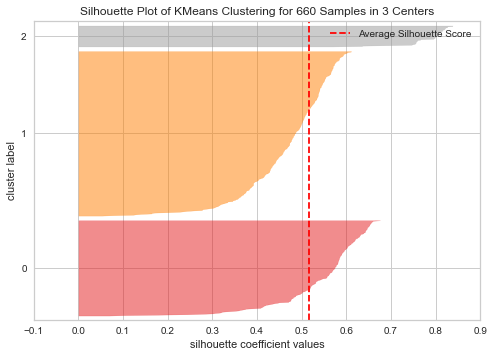

In [44]:
# Number of clusters with silhouette coefficients, just graphical confirming the above results
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(set_scaled_no_outlier_df_k)
visualizer.show()

In [45]:
# let's take 3 as number of clusters and fit the model
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(set_scaled_no_outlier_df_k )

KMeans(n_clusters=3, random_state=0)

In [46]:
# Adding kmeans cluster labels to the original and scaled dataset

card3["K_means_segments"] = kmeans.labels_
set_scaled_no_outlier_df_k["K_means_segments"] = kmeans.labels_

We built the model with 3 clusters and we merged it with the original dataset. We will continue with Hierarchical Clustering and then we are going to perform segmentation analyses with the different approaches.

### <a name='link6'> Applying Hierarchical clustering </a>

We are going to build Hierarchical Clustering options by using different distance and linkage 
calculation methods.     
We are splitting into two steps Euclidean and Chebyshev, Mahalanobis, Cityblock because Ward and Centroid methods apply to Euclidian distance only.    
As well we will check with and without Outlier treatment.    


In [47]:
print (" Without Outliers - Chebyshev, Mahalanobis, Cityblock")
# list of distance metrics
distance_metrics = [ "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted" ]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

# Function calculating the Cophenetic Correlation
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(set_scaled_no_outlier_df_hir, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(set_scaled_no_outlier_df_hir))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

 Without Outliers - Chebyshev, Mahalanobis, Cityblock
Cophenetic correlation for Chebyshev distance and single linkage is 0.6882876568342585.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7672199195985938.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8907216945489854.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.782728724334691.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6583934280485619.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.38849437921029495.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7998609088477291.
Cophenetic correlation for Mahalanobis distance and weighted linkage is 0.6221434055030451.
Cophenetic correlation for Cityblock distance and single linkage is 0.6711679581499276.
Cophenetic correlation for Cityblock distance and complete linkage is 0.8365243185904129.
Cophenetic correlation for Cityblock distance 

In [48]:
print (" Without Outliers - Euclidean")
# list of distance metrics
distance_metrics = ["euclidean"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted", "ward", "centroid"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

# Function calculating the Cophenetic Correlation
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(set_scaled_no_outlier_df_hir, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(set_scaled_no_outlier_df_hir))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

 Without Outliers - Euclidean
Cophenetic correlation for Euclidean distance and single linkage is 0.6666982080229052.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8207884321476555.
Cophenetic correlation for Euclidean distance and average linkage is 0.8926672966587861.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8872365340578665.
Cophenetic correlation for Euclidean distance and ward linkage is 0.7702265240776373.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.8880634847869346.


In [49]:
print (" With Outliers - Chebyshev, Mahalanobis, Cityblock ")
# list of distance metrics
distance_metrics = [  "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted", ]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

# Function calculating the Cophenetic Correlation
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(set_scaled_with_outlier_df_hir, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(set_scaled_with_outlier_df_hir))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

 With Outliers - Chebyshev, Mahalanobis, Cityblock 
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553606.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875361.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic correlation for Mahalanobis distance and weighted linkage is 0.7805990615142518.
Cophenetic correlation for Cityblock distance and single linkage is 0.7252379350252723.
Cophenetic correlation for Cityblock distance and complete linkage is 0.8731477899179829.
Cophenetic correlation for Cityblock distance an

In [50]:
print (" With Outliers - Euclidean ")
# list of distance metrics
distance_metrics = [  "euclidean"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted", "ward", "centroid" ]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

# Function calculating the Cophenetic Correlation
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(set_scaled_with_outlier_df_hir, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(set_scaled_with_outlier_df_hir))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

 With Outliers - Euclidean 
Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Euclidean distance and ward linkage is 0.7415156284827493.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.8939385846326323.


The highest Cophenetic correlation indicating the best option to calculate the distance with each dataset (with and without Outliers)  is Euclidian distance with the Average Linkage. The Cophenetic correlation result is almost 0.9, more than 0.75 scoring is a good result.     
While Euclidean and Cityblock Cophenetic correlation results are similar with both datasets (with and without Outliers), but we observe a higher difference with Chebyshev and Mahalanobis, so the Outliers are playing a bigger role.     
The Euclidian distance with Average Linkage results with and with Outliers’ treatment is almost the same with so we are going to continue to analyze using the dataset with Outliers treated so it's consistent to compare with the K-Means results.     


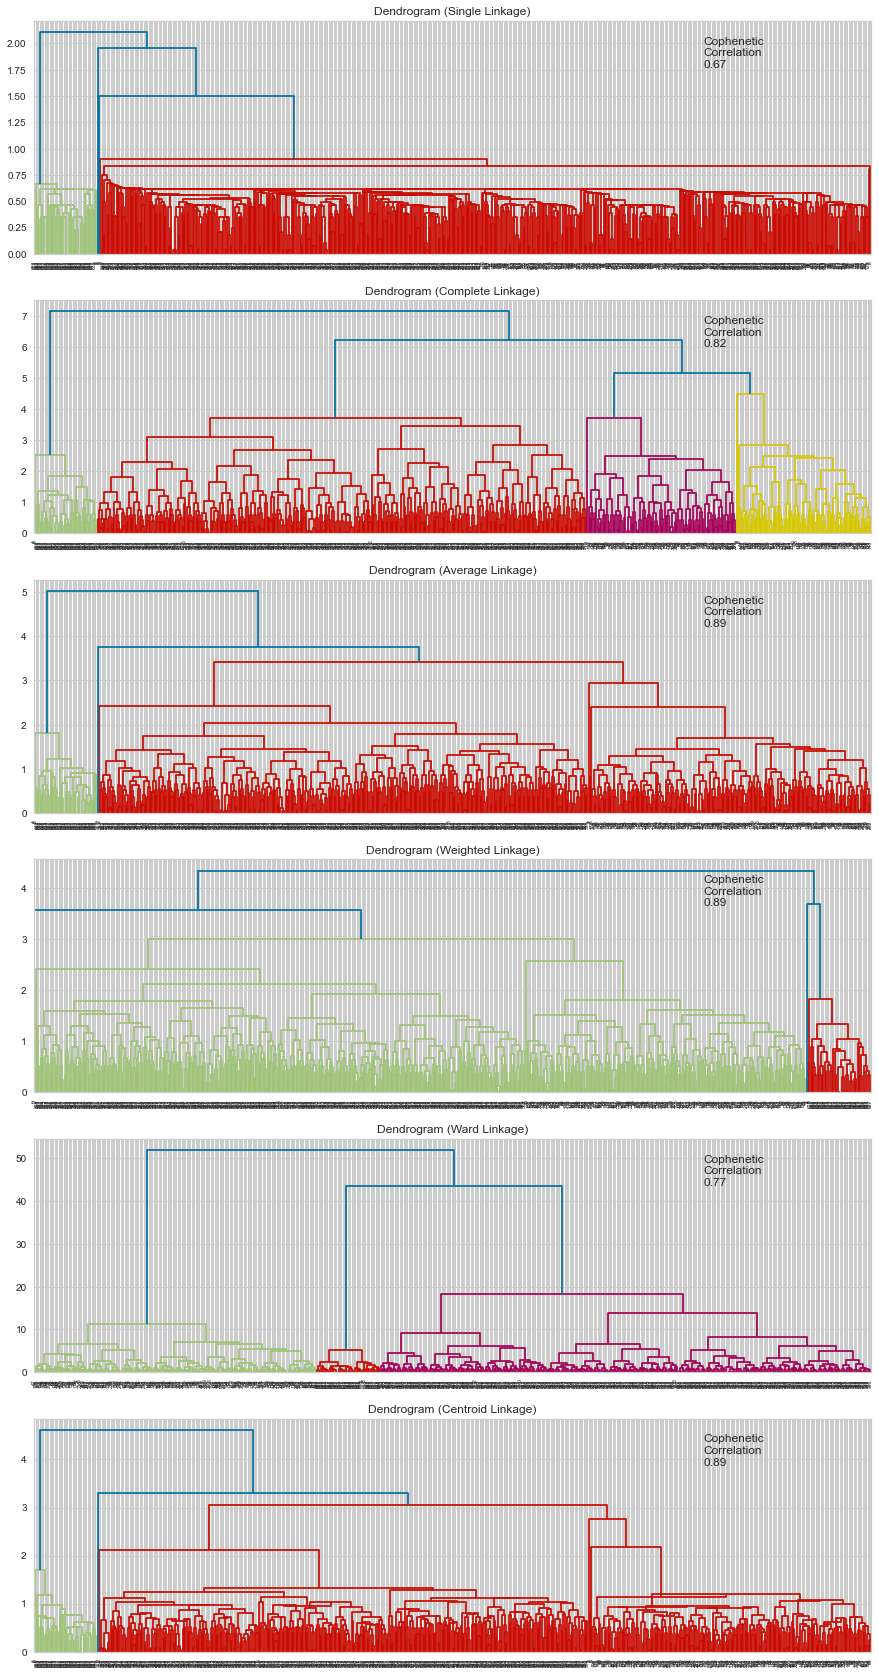

In [51]:
# list of linkage methods, we want some level of comparison even we know Average linkage is the best option
linkage_methods = ["single", "complete", "average", "weighted", "ward", "centroid"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
# Euclidean is the best distance calculation option, so we use it as the "metric"
for i, method in enumerate(linkage_methods):
    Z = linkage(set_scaled_no_outlier_df_hir, metric="euclidean", method=method) 

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(set_scaled_no_outlier_df_hir))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [52]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_compare= pd.DataFrame(compare, columns=compare_cols)
df_compare

,Linkage,Cophenetic Coefficient
0,single,0.666698
1,complete,0.820788
2,average,0.892667
3,weighted,0.887237
4,ward,0.770227
5,centroid,0.888063


Colored lines in the below dendrogram help, lines that join at a distance less than the cut-off value are “clustered.        
”The Single, Average, Ward, Centroid, Complete, and Weight linkage methods results are indicating 4 clusters are the best option. But Complete and Ward linkage methods show 4 with more clarity, as the others look like having only one line as one of the clusters, probably indicating one customer with exceptional values.        
Ward's method minimum variance criterion minimizes the total within-cluster variance, and in its Hierarchical Clustering Dendrogram is clearly showing 4 clusters so the 4th  cluster in the Average Linkage is an exception. Off-Course, we will need to choose 4 clusters if we fit the Euclidian Distance with Average Linkage, so we tackle the 4th cluster exception.       
The model is using 4 clusters with Euclidean distance calculation and Average Linkage, this is having the best Cophenetic Coefficient, almost 0.9. Dataset with treated Outliers was used to keep consistency as the results were almost the same.      
   
 


In [53]:
# Fit the model with the best methods and optimal number of clusters
Hir_model = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
Hir_model.fit(set_scaled_no_outlier_df_hir)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [54]:
# Adding hierarchical cluster labels to the original and scaled dataset

set_scaled_no_outlier_df_hir["HC_Clusters"] = Hir_model.labels_
card5["HC_Clusters"] = Hir_model.labels_

In the next phase, we are going to analyze the customer segmentation using the outcome of this Hierarchical Clustering model and the K- Means well. 

### <a name='link7'> Compare clusters from K-means and Hierarchical Clustering and perform cluster profiling  </a>

We are going to compare the segmentation and see how it's helping in building the right customers' profiles.  


In [55]:
# Let calculate the average for the K-Means dataset 
cluster_profile_no_outlier_k = card3.groupby("K_means_segments").mean()

In [56]:
# Let count the records for the K-Means dataset
cluster_profile_no_outlier_k["count_in_each_segments"] = (
    card3.groupby("K_means_segments")["Avg_Credit_Limit"].count().values)

In [57]:
# Let calculate the average for the Hierarchical Clustering  dataset 
cluster_profile_no_outlier_hir = card5.groupby("HC_Clusters").mean()

In [58]:
# Let count the records for the Hierarchical Clustering  dataset 
cluster_profile_no_outlier_hir["count_in_each_segments"] = (
    card5.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values)

In [59]:
# let's display cluster profiles after above calculations -> K-Means
cluster_profile_no_outlier_k.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.546875,6.870536,224
2,102660.000000,8.740000,0.600000,8.180000,1.080000,50


In [60]:
# let's display cluster profiles ->  Hierarchical Clustering  
cluster_profile_no_outlier_hir.style.highlight_max(color="lightblue", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,12197.309417,2.403587,0.928251,3.553812,6.883408,223
1,33541.450777,5.520725,3.492228,0.984456,2.010363,386
2,100000.000000,2.000000,1.000000,1.000000,0.000000,1
3,102660.000000,8.740000,0.600000,8.180000,1.080000,50


We can observe many similarities even in K-Means and Hierarchical Clustering name the clustering with different numbers.          
Hierarchical cluster 0 is almost like K-Means cluster 1, Hierarchical cluster 1 is almost like K-Means cluster 0, Hierarchical cluster 3 is almost like K-Means cluster 2. The difference Hierarchical Clustering having an extra cluster, 2, with one customer. We are going to ignore the one customer cluster from the analysis as it's not interesting in the big schema.      
-	Average Credit limits are ~12K and ~34K USD for two clusters, while the third one is showing  ~103K USD.       
-	The average number of credit cards is the same across the 3 clusters: ~2.4, ~5.5, and ~8.7.     
-	Total visits to the bank are almost the same for the 3 clusters: ~3.5, ~0.92, and 0.6.       
-	Total visits online as well are very similar for 2 clusters: ~3.5 and ~0.98, and ~8.       
-	The total number of calls is almost the same across the 3 clusters: ~2, ~7, and ~1.        
-	The number of records is showing only one record clustered differently, it looks like the rest are in the same group.       


Let analyse the clusters and create the customers' segmentation and profiling.     


In [61]:
# Let check clusters by total number of credit cards 
pd.crosstab(card3.K_means_segments, card3.Total_Credit_Cards).style.highlight_max(
    color="lightgreen", axis=0
)

Total_Credit_Cards,1,2,3,4,5,6,7,8,9,10
K_means_segments,,,,,,,,,,
0,0,1,0,102,73,116,94,0,0,0
1,59,63,53,49,0,0,0,0,0,0
2,0,0,0,0,1,1,7,11,11,19


In [62]:
# Let check clusters by total number of credit cards 
pd.crosstab(card5.HC_Clusters, card5.Total_Credit_Cards).style.highlight_max(
    color="lightblue", axis=0
)

Total_Credit_Cards,1,2,3,4,5,6,7,8,9,10
HC_Clusters,,,,,,,,,,
0,59,63,53,48,0,0,0,0,0,0
1,0,0,0,103,73,116,94,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,7,11,11,19


In [63]:
# Let check clusters by Average Credit Limit
pd.crosstab(card3.K_means_segments, card3.Avg_Credit_Limit).style.highlight_max(
    color="lightgreen", axis=0
) 
 

Avg_Credit_Limit,3000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,25000,26000,27000,28000,29000,30000,31000,32000,33000,34000,35000,36000,37000,38000,39000,40000,41000,42000,43000,44000,45000,46000,47000,48000,49000,50000,51000,52000,54000,55000,56000,57000,58000,59000,60000,61000,62000,63000,64000,65000,66000,67000,68000,69000,70000,71000,72000,73000,74000,75000,84000,91000,94000,95000,96000,97000,98000,99000,100000,105000
K_means_segments,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,8,14,11,15,10,12,9,10,10,9,6,9,10,14,13,7,1,5,2,3,5,6,5,2,4,6,2,11,6,8,7,3,6,2,1,3,3,3,6,6,4,7,4,6,4,1,7,3,3,4,5,3,3,2,4,5,4,3,7,4,10,4,3,4,6,2,0,0,0,0,0,0,0,0,1,0
1,1,13,17,13,20,18,14,15,8,18,14,11,13,13,9,13,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,1,2,39


In [64]:
# Let check clusters by Average Credit Limit
pd.crosstab(card5.HC_Clusters, card5.Avg_Credit_Limit).style.highlight_max(
    color="lightblue", axis=0
) 
 

Avg_Credit_Limit,3000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,25000,26000,27000,28000,29000,30000,31000,32000,33000,34000,35000,36000,37000,38000,39000,40000,41000,42000,43000,44000,45000,46000,47000,48000,49000,50000,51000,52000,54000,55000,56000,57000,58000,59000,60000,61000,62000,63000,64000,65000,66000,67000,68000,69000,70000,71000,72000,73000,74000,75000,84000,91000,94000,95000,96000,97000,98000,99000,100000,105000
HC_Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,13,17,12,20,18,14,15,8,18,14,11,13,13,9,13,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,8,14,12,15,10,12,9,10,10,9,6,9,10,14,13,7,1,5,2,3,5,6,5,2,4,6,2,11,6,8,7,3,6,2,1,3,3,3,6,6,4,7,4,6,4,1,7,3,3,4,5,3,3,2,4,5,4,3,7,4,10,4,3,4,6,2,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,1,2,39


In [65]:
# Let check clusters by total visits to the bank
pd.crosstab(card3.K_means_segments, card3.Total_visits_bank).style.highlight_max(
    color="lightgreen", axis=0
) 

Total_visits_bank,0,1,2,3,4,5
K_means_segments,,,,,,
0,0,3,93,100,92,98
1,80,79,65,0,0,0
2,20,30,0,0,0,0


In [66]:
# Let check clusters by total visits to the bank
pd.crosstab(card5.HC_Clusters, card5.Total_visits_bank).style.highlight_max(
    color="lightblue", axis=0
) 

Total_visits_bank,0,1,2,3,4,5
HC_Clusters,,,,,,
0,80,79,64,0,0,0
1,0,2,94,100,92,98
2,0,1,0,0,0,0
3,20,30,0,0,0,0


In [67]:
# Let check clusters by total visits online
pd.crosstab(card3.K_means_segments, card3.Total_visits_online).style.highlight_max(
    color="lightgreen", axis=0
) 

Total_visits_online,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,8.5
K_means_segments,,,,,,,,,,
0,144,106,135,1,0,0,0,0,0,0
1,0,3,54,43,69,54,0,0,0,1
2,0,0,0,0,0,0,1,7,6,36


In [68]:
# Let check clusters by total visits online
pd.crosstab(card5.HC_Clusters, card5.Total_visits_online).style.highlight_max(
    color="lightblue", axis=0
) 

Total_visits_online,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,8.5
HC_Clusters,,,,,,,,,,
0,0,3,53,43,69,54,0,0,0,1
1,144,105,136,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,7,6,36


In [69]:
# Let check clusters by total calls made
pd.crosstab(card3.K_means_segments, card3.Total_calls_made).style.highlight_max(
    color="lightgreen", axis=0
) 

Total_calls_made,0,1,2,3,4,5,6,7,8,9,10
K_means_segments,,,,,,,,,,,
0,81,74,72,82,77,0,0,0,0,0,0
1,0,1,1,0,31,29,39,35,30,32,26
2,16,15,18,1,0,0,0,0,0,0,0


In [70]:
# Let check clusters by total calls made
pd.crosstab(card5.HC_Clusters, card5.Total_calls_made).style.highlight_max(
    color="lightblue", axis=0
) 

Total_calls_made,0,1,2,3,4,5,6,7,8,9,10
HC_Clusters,,,,,,,,,,,
0,0,1,1,0,30,29,39,35,30,32,26
1,80,74,72,82,78,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,16,15,18,1,0,0,0,0,0,0,0


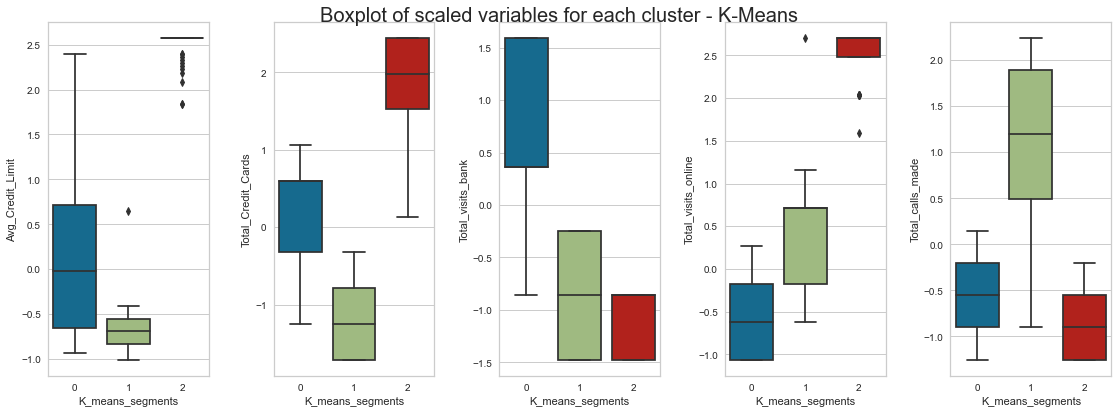

In [71]:
# Let create boxplot with variables, scaled
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled variables for each cluster - K-Means", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=set_scaled_no_outlier_df_k [variables_col[counter]],
        x=set_scaled_no_outlier_df_k ["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

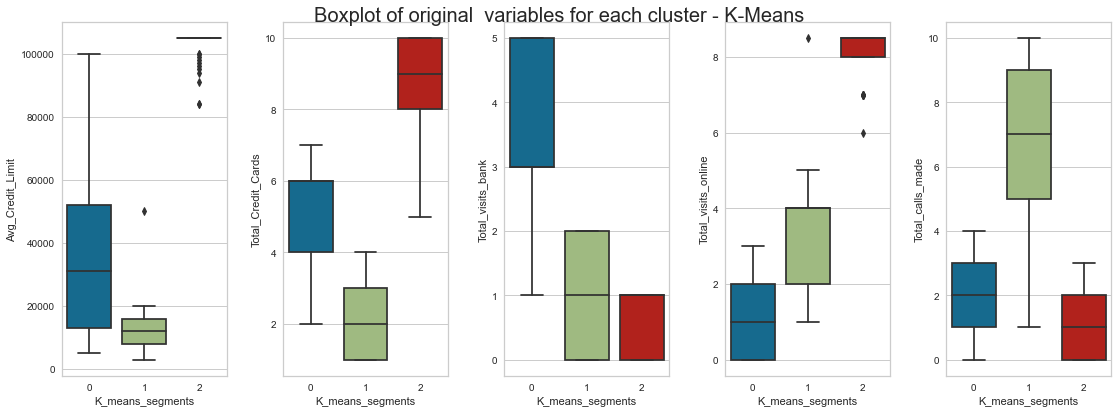

In [72]:
# Let create boxplot with variables 
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original  variables for each cluster - K-Means", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=card3[variables_col[counter]], x=card3["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

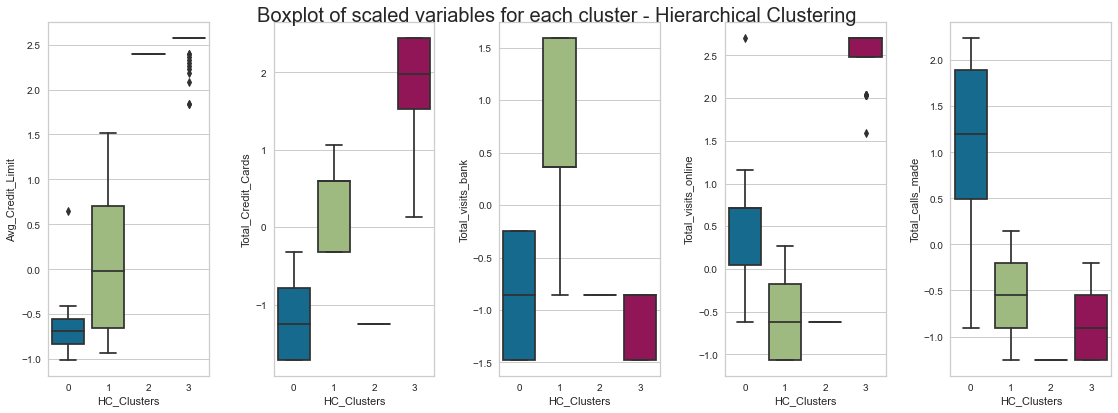

In [73]:
# Let create boxplot with variables, scaled
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled variables for each cluster - Hierarchical Clustering ", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=set_scaled_no_outlier_df_hir[variables_col[counter]],
        x=set_scaled_no_outlier_df_hir["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

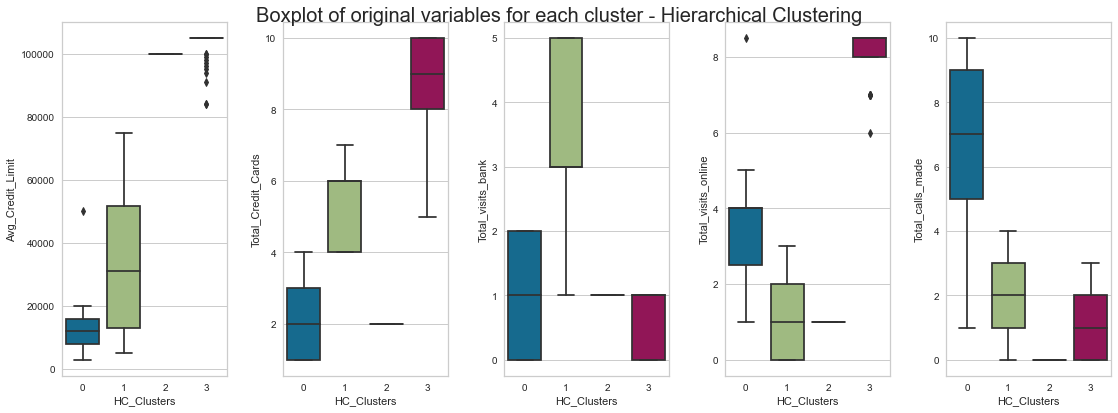

In [74]:
# Let create boxplot with variables 
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original variables for each cluster - Hierarchical Clustering", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=card5[variables_col[counter]], x=card5["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

 
**Insights and segmentation summary**    

Let call the segments A, B, C, and D so it's easier to profile regardless of the different names (0, 1, 2, and 3) named before.        

Segment A:           
- This is grouping with almost ~60% of the customers.          
- It's having an average credit limit, ~33K USD, and approximately ~5.5 credit cards.  The distribution shows 4 to 7 credit cards.        
- The credit distribution is around the average of ~33K USD and not customers having more than ~75K USD. So, it looks like even if it's having many customers.         
- It has the highest average total visits to the bank, ~3.4. It's equally distributed visits from 2 to 5, ~100 each.       
- The lowest number of visits online across the clusters, the average is almost ~1. It's the same in both cases, 144 no visiting at all followed by 105/6 with one visit and 135/6 with two visits.       
- The average number of calls is ~2. They don't call at all they have a similar number of calls from 1 to 4, around ~80 calls.      
- So, we can conclude these customers preferred F2F and "high touch" interaction.      
	   
Segment B:         
- This group is having 223 or 224 depending on the model. So, it's accounting for another ~34% of the customers.        
- The average credit limit is ~12K USD. This is the lowest credit limit segment with a max value of 20K USD. They are less affluent.     
- The average number of credit cards is ~2.4, having 1 to 3 credit cards.      
- The customers have very few visits to the bank, 0 or 1 distributed approximately half and half.     
- Visit online distribution are most 2 to 5 visits with an average of ~3.5.       
- The number of calls is high having 4 to 10 calls, the average is ~6.8.        
- These customers receive the service remotely by using digital options or calling the bank vs. visiting the bank.       

Segment C:           
- This group of customers is very small, approximately ~7% of the customers.       
- The credit limit is around 102K USD. The averages are the highest vs. the other two segments.       Most of them are around 105K USD due to the outlier treatment. So even it's a small group, they are affluent.        
- As well almost all the customers have 8 to 10 credit cards. The average is ~8.7.      
- Visit the bank is very low, average ~0.6. 40% are not visiting at all and the other 60% only once. 
- Visits online are the highest, most of them visiting more than 7 times. The average is ~8.      
- The number of calls is low having 1 or 2 calls for 70% of the customers, and the rest not even one. The average is ~1.      
- So, these customers preferred digital interaction.      
    
Segment D:   
  - This is only one customer under Hierarchical Clustering having a 100K USD credit limit, 2 credits cards, 1 visit to the bank, and online but not phone calls.     


### <a name='link8'> Conclusions and wrap up  </a>

 
We can observe the clustering methods have very similar results from grouping and profiling characteristics.    
As well outliers treatment impact was not playing a significant impact in most of the cases.    
We can identify 3 groups, group 4 under Hierarchical Clustering with one customer is having low potential so we will exclude it in the meantime.    




#### Business Recommendations  

Segment A:  
•	The biggest segment with almost ~60% of the customers, credit card limit and the number of credit card not high neither low. So, this segment has a high potential from a customer volume perspective. 
•	AllLife Bank can upsell this group, try to sell more credit cards, and evaluate to increase credit limits when risks allow it. And off course, AllLife Bank should bring customers from other banks with a similar profile.   
•	AllLife Bank can offer the customers discount deals and discounts in their preferred shops.
•	These customers are visiting the bank to the highest extend so the online and phone calls options are not fully utilized.   
•	AllLife bank can offer 10 min coaching and "How to do I" in the bank branches, trying to move the customers to the online and calls options. At the same time offer to the decrease turn around of queries and issues, preferred services, so the customers will be motivated to use less F2F services and as well receive better customer support. Remark: F2F services are more expensive and typically make customers wait in lines.  

Segment B:   
•	This is the second biggest segment with almost ~34% of the customers. This looks like to be the less lucrative segment with the lowest number of credit limits and credit cards.    
•	We can upsell this group and try to sell more credit cards and evaluate to increase credit limits when risks allow it. As well as bring more customers from other banks with a similar profile.    
•	As this segment maybe more sensitive to discount deals as they are less affluent, offer them even better discounts and deals in their preferred shops.    
•	Most of the interaction is not F2F by rather online and phone calls, so it means the customer is more familiar or aware of such options.   
•	As well AllLife Bank can offer "prizes" (e.g. subsided internet, vouchers) to the customers using online services and explaining the turnover is faster. Pushing them further self-service support and user experience improvement.    

Segment C:  
•	This is a small segment with ~7% of the customers but by far is the more affluent and profitable one.   
•	High credit limits and the number of credit cards.
•	They are very independent using online services, almost not visiting, or calling the bank.
•	In this case, AllLife Bank can offer higher-end deals and discount accommodating these types of wealthy customers.    
•	A way to attract customers from other banks and improve the service by adding better and the latest online capabilities allowing them to better manage the credit cards and credit limits. Make them aware of the "top of the art" best industry online practices so the overall service will be faster and satisfactory.   
•	Use this approach while branding AllLife Bank and make it public on social media -> “best online services”, “high tech”. These are the most lucrative customers, so the bank wants to increase its percentage even more.   

Segment D:   
•	Only the Hierarchical Clustering method identifies such an outlier customer as a separate cluster. The recommendation is to focus on the previous clusters and not invest resources.    

In all segments, the bank should monitor customer satisfaction evolution and look for areas of improvement.

